In [2]:
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [3]:
dataset_root = "/nfs/rwork/DATABASES_OPENSOURCE/TCIA/Selected_MRIs.csv"
sources = pd.read_csv(dataset_root)
print(len(sources))

561


In [27]:
IMG_SIZE = 512
def resize(x):
    num_slices = min(x.shape)
    big_size = max(x.shape)
    slice_dim = x.shape.index(num_slices)
    big_dim = [i for i in [0,1,2] if i is not slice_dim][0]
    small_dim = [i for i in [0,1,2] if i not in [big_dim, slice_dim]][0]
    small_size = x.shape[small_dim]
    x = np.transpose(x, (big_dim, small_dim, slice_dim))
    if big_size > small_size:
        pad_left = int((big_size - small_size)/2)
        pad_right = big_size - small_size - pad_left
        x = np.pad(x, [[0, 0], [pad_left, pad_right], [0, 0]])

    if big_dim != IMG_SIZE:
        res_size = (
            IMG_SIZE,
            IMG_SIZE
        )
        x = cv2.resize(x, dsize=res_size, interpolation=cv2.INTER_CUBIC)
    x = np.transpose(x, (big_dim, small_dim, slice_dim))
    x = np.reshape(x, (num_slices, 1, IMG_SIZE, IMG_SIZE))
    return x

In [28]:
image = np.random.rand(100,100,100)
 # resize a numpy array using cv2 
print(image.shape)
scaled = scaling(image)
print(scaled.shape)

(100, 100, 100)
(100, 1, 512, 512)


In [7]:
total_slices = 0
loop = tqdm(range(len(sources)))
fails = 0
for i in loop:
    try:
        nii_ = nib.load(
            sources.iloc[i]["FinalPath"]
        )
        image = nii_.get_fdata()
    except:
        fails += 1
    if len(image.shape) == 3 and np.min(image) >= 0:
        total_slices += min(image.shape)
    else:
        fails += 1


100%|██████████| 561/561 [01:15<00:00,  7.41it/s]


In [8]:
print(total_slices)
print(fails)

44817
19


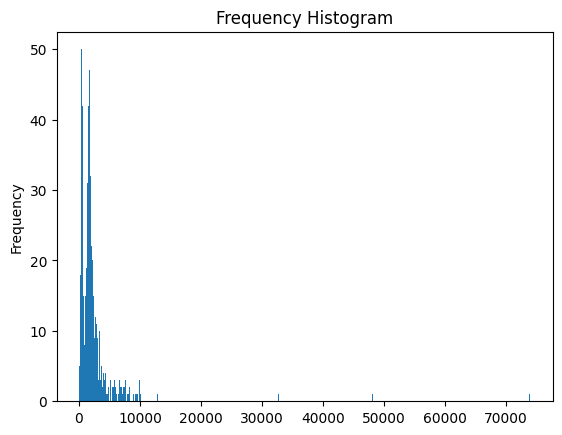

In [14]:
plt.hist(max_list, bins=500)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [36]:
nii_ = nib.load(
    sources.iloc[20]["FinalPath"]
)
image = nii_.get_fdata()

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

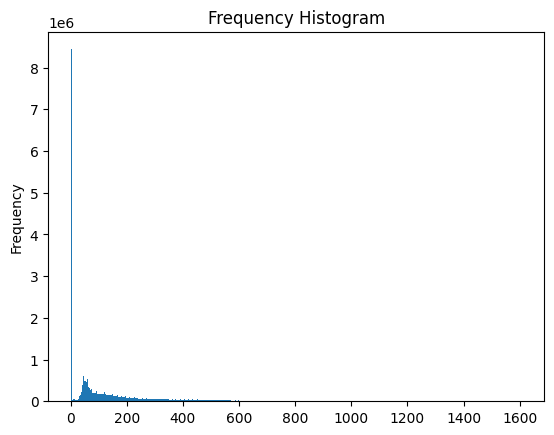

In [37]:
plt.hist(image.reshape(-1), bins=500)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

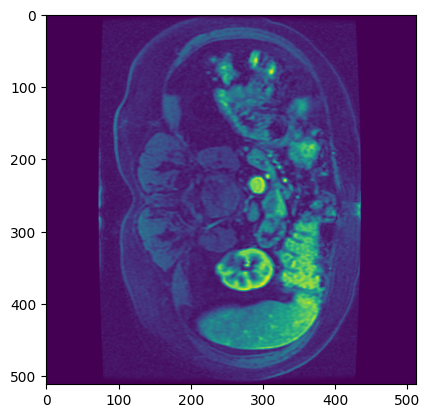

In [38]:
plt.imshow(image[:,:,10])

In [44]:
print(image[0,0,0])

0.0


In [42]:
def clip(image):
    lim = 2000
    x = np.where(image < 0, 0, image)
    x = np.where(x > lim, lim, x)
    return x/lim

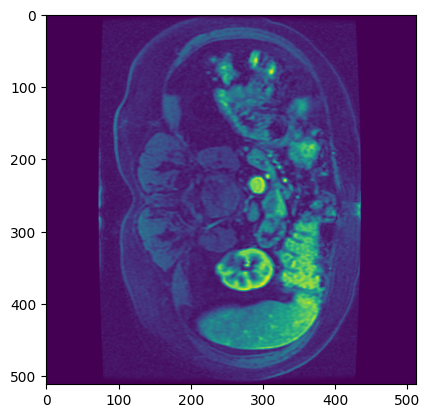

In [43]:
plt.imshow(clip(image[:,:,10]))